 
# Bike sharing excercise approach 1

##### For this excerice I have used the hour.csv file from the Bikesharing datasets link: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

## Importing Required Libraries

In [1]:

#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

### Dataset observation

In [2]:
df = pd.read_csv('hour.csv',low_memory=False)

In [3]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
df.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.shape

(17379, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Description of the metadata:

 - <b> "instant" </b>: record index
 - <b> "dteday" </b> : date
 - <b> "season" </b> : season (1: winter, 2: spring, 3: summer, 4: fall)
 - <b> "yr" </b> : year (0: 2011, 1: 2012)
 - <b> "mnth" </b> : month ( 1: January to 12: December)
 - <b> "hr" </b> : hour (0 to 23)
 - <b> "holiday" </b> : whether day is holiday (1) or not (0)
 - <b> "weekday"</b> : day of the week (0: Sunday to 6: Saturday)
 - <b> "workingday" </b> : if day is neither weekend nor holiday (1), otherwise is (0).
 - <b> "weathersit" :</b>
        1 = Clear, Few clouds, Partly cloudy, Partly cloudy
        2 =  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3 =  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4 =  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - <b> "temp" </b> : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
 - <b> "atemp" </b> : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
 - <b> "hum" </b> : Normalized humidity. The values are divided to 100 (max)
 - <b> "windspeed" </b> " : Normalized wind speed. The values are divided to 67 (max)
 - <b> "casual" </b> : count of casual users
 - <b> "registered" </b> : count of registered users
 - <b> "cnt" </b> : count of total rental bikes including both casual and registered

<b> Our target attribute is <b> cnt </b> number of bikes count in a given hour. 

In [7]:
df["instant"] = df.index  # change instant into index

In [8]:
def UniqueValues(df):
    # Print the number of unique values of each column, only printing those that have less than 100 unique values

    col = df.columns.tolist()  # Redo this list because columns dropped
    NbrSamples = len(df)

    for c in col:
        s = sorted(set(df[c]))
        #s = set(df[c])
        count = len(s)
        if count == NbrSamples:
            print(f"\n {c} \n\nPossible Index: {count} unique values")
        elif count < 100:
            print(f"\n {c}: {s}")
        else:
            print(f"\n {c}: {count} unique values")


In [9]:
UniqueValues(df)


 instant 

Possible Index: 17379 unique values

 dteday: 731 unique values

 season: [1, 2, 3, 4]

 yr: [0, 1]

 mnth: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

 hr: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

 holiday: [0, 1]

 weekday: [0, 1, 2, 3, 4, 5, 6]

 workingday: [0, 1]

 weathersit: [1, 2, 3, 4]

 temp: [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

 atemp: [0.0, 0.0152, 0.0303, 0.0455, 0.0606, 0.0758, 0.0909, 0.1061, 0.1212, 0.1364, 0.1515, 0.1667, 0.1818, 0.19699999999999998, 0.2121, 0.2273, 0.2424, 0.2576, 0.2727, 0.2879, 0.303, 0.3182, 0.3333, 0.3485, 0.3636, 0.3788, 0.3939, 0.4091, 0.4242, 0.4394, 0.4545, 0.4697, 0.4848, 0.5, 0.5152, 0.5303, 0.5455, 0.5606, 0.5758, 0.5909, 0.6061, 0.621

In [10]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8689.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        0.0000      1.000000      0.000000      1.000000      0.000000   
25%     4344.5000      2.000000      0.000000      4.000000      6.000000   
50%     8689.0000      3.000000      1.000000      7.000000     12.000000   
75%    13033.5000      3.000000      1.000000     10.000000     18.000000   
max    17378.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000



##### We can observe that all  features  contains  numerical variables and the target variable (cnt)  that we have to predict is a count variable. This is a typical example of a regression problem as the count variable is continuous varied.

In [11]:
# df.duplicated().any() # check for dublicates

## Exploratory Data Analysis



### Before deeply analysing our data, let's check the data quality of this dataset.

In [12]:
xdf = df.copy()

### Check for NULL/missing values

In [13]:
# percentage of missing values in each column
round(100*(xdf.isnull().sum()/len(xdf)), 2).sort_values(ascending=False)

cnt           0.0
weekday       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
workingday    0.0
registered    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
instant       0.0
dtype: float64

In [14]:
# row-wise null count percentage
round((xdf.isnull().sum(axis=1)/len(xdf))*100,2).sort_values(ascending=False)

17378    0.0
5787     0.0
5801     0.0
5800     0.0
5799     0.0
        ... 
11580    0.0
11579    0.0
11578    0.0
11577    0.0
0        0.0
Length: 17379, dtype: float64

#### There are no missing / Null values either in columns or rows

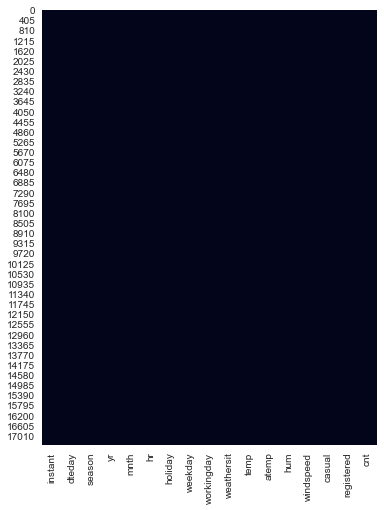

In [15]:
# Let's visualize it

plt.figure(figsize = (6,8))
sns.heatmap(xdf.isnull(), cbar = False);

###  Duplicate Check

In [16]:
xdf_dup = xdf.copy()

# Checking for duplicates and dropping the entire duplicate row if any
xdf_dup.drop_duplicates(subset=None, inplace=True)

In [17]:
xdf_dup.shape

(17379, 17)

In [18]:
xdf.shape

(17379, 17)

 #### The shape after running the drop duplicate command is same as the original dataframe.Hence we can conclude that there were zero duplicate values in the dataset. 

#### It looks that there are no Junk/Unknown values in the entire dataset.

### Univariate Analysis of the target attribute

In [19]:
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

so by seeing the result we can conclude
cnt - ranges between min of 1 and max of 977 which means that each hour has seen a minimum of 1 bike rental to max of 977 bike rentals that good right and avg rental count  - 189.5 as we are dealing with continuous numerical variables where linear regression is the right choice to train and predict bicycle rental count. 


Text(0.5, 0.98, 'Recorded Bike Rental Counts')

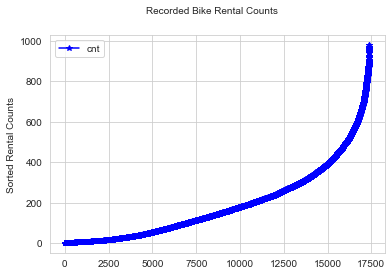

In [20]:
fig, ax = plt.subplots(1)
ax.plot(sorted(xdf['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)


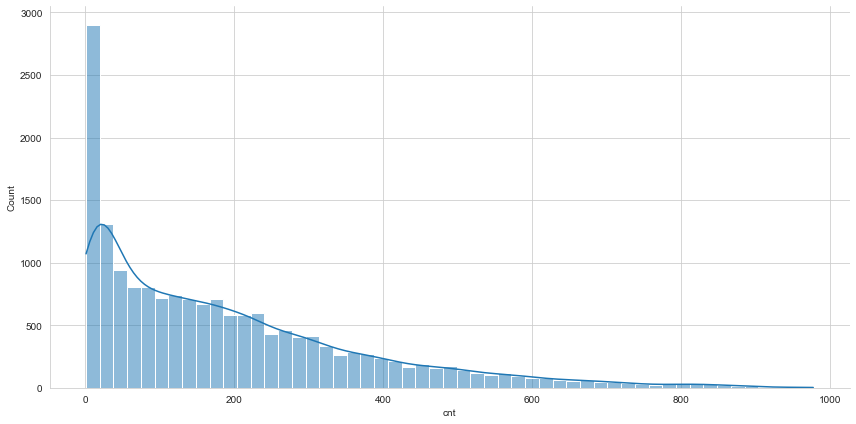

In [21]:
# Let's check it's distriubtion

sns.displot(x = 'cnt', data = xdf, aspect = 2, height = 6, kde = True);

#### t's postively skewed, we don't want to touch the prediction data. So leaving it as it is.

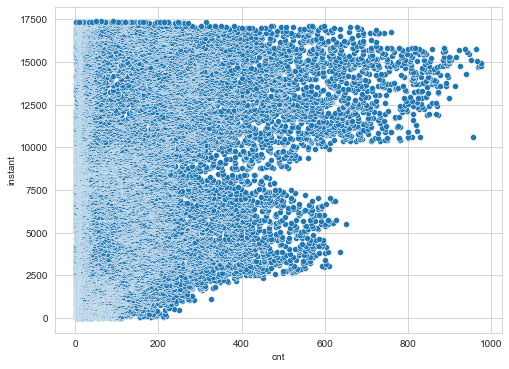

In [22]:
# Scatterplot

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'cnt', y = "instant", data = xdf);

#### As we can see, there are some amount of outliers. Let's confirm this on <b> Boxplot </b>

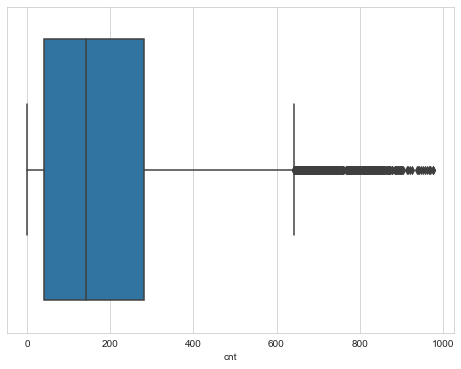

In [23]:
# Boxplot

plt.figure(figsize = (8,6))
sns.boxplot(x = "cnt", data = xdf);

In [24]:
xdf['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [25]:
## Let's normally distribute the data

## function reducing +ve skewness using Sqrt 

def sqrt_transformation(dataframe):
  return np.sqrt(dataframe)


# function for removing outliers

def remove_outliers(dataframe, column):
  q3 = dataframe[column].quantile(0.75)
  q1 = dataframe[column].quantile(0.25)
  IQR = q3 - q1
  
  upper = q3 + (1.5 * IQR)
  lower = q1 - (1.5 * IQR)
  
  dataframe = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

  return dataframe



In [26]:
# Remove outliers on 'Target Attribute'

xdf = remove_outliers(xdf,'cnt')

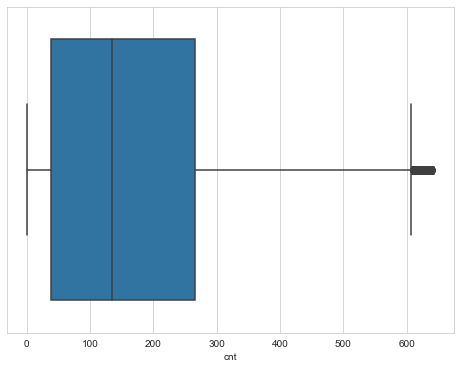

In [27]:
# boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x = "cnt", data = xdf);

In [28]:
# describe
xdf['cnt'].describe()

count    16874.000000
mean       172.710146
std        155.020918
min          1.000000
25%         38.000000
50%        135.000000
75%        265.750000
max        642.000000
Name: cnt, dtype: float64

#### There were 505 outliers detected

## Univariate Analysis of the independent Variables 

In [29]:
xdf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [30]:
# Selecting the numerical features from the independent variables

numerical_df = xdf.select_dtypes(exclude='object')

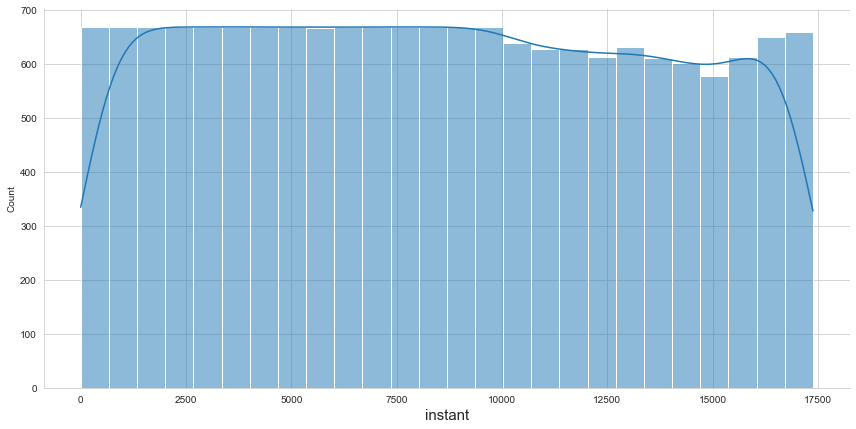

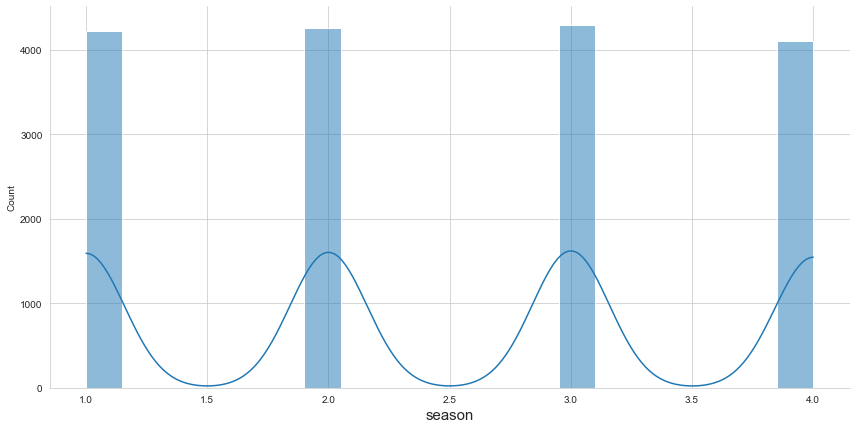

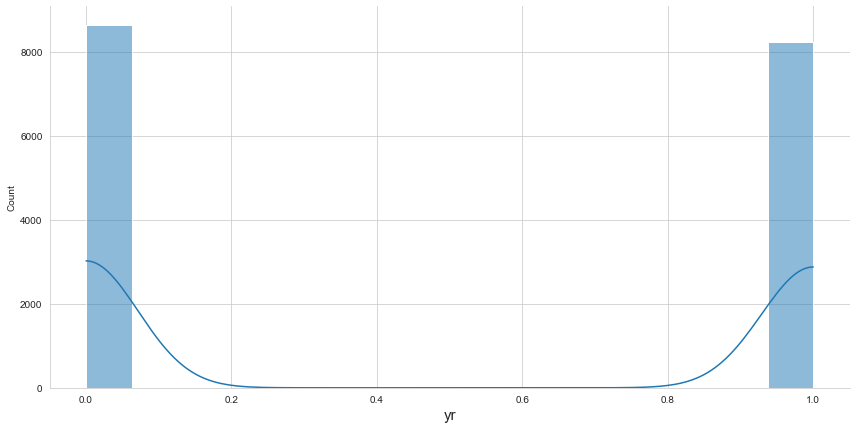

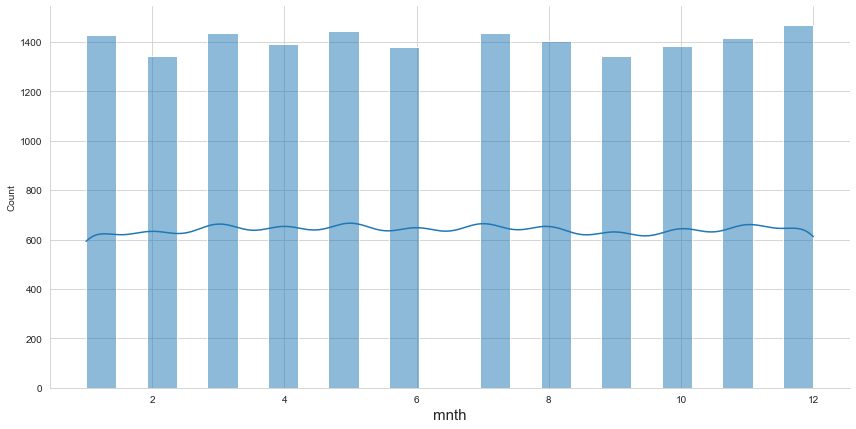

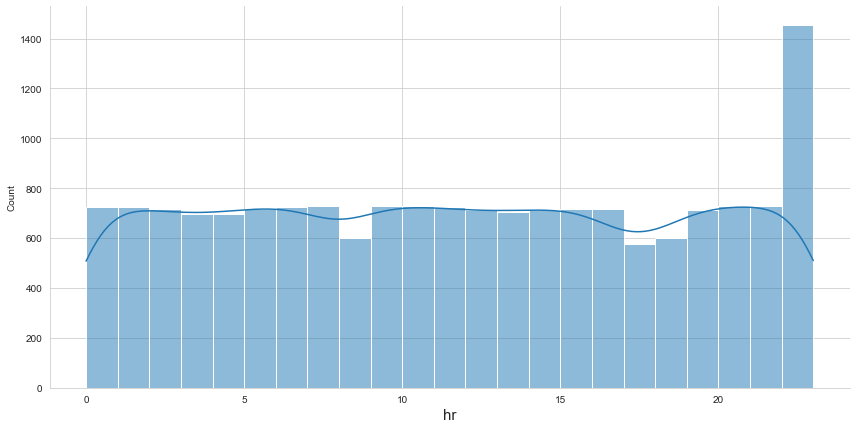

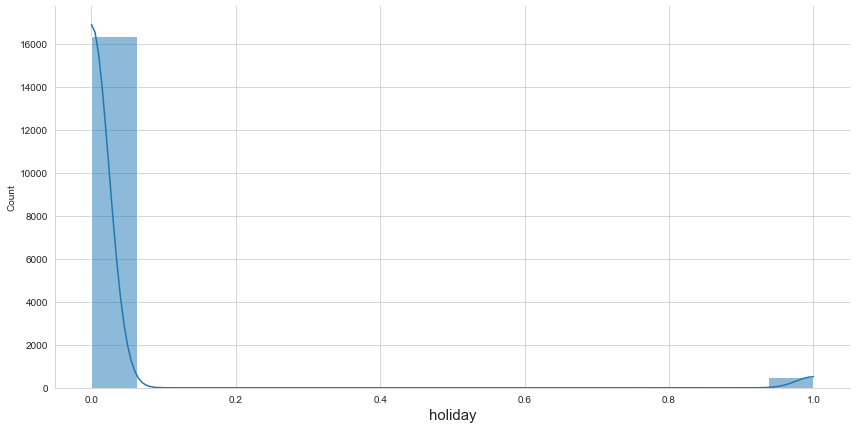

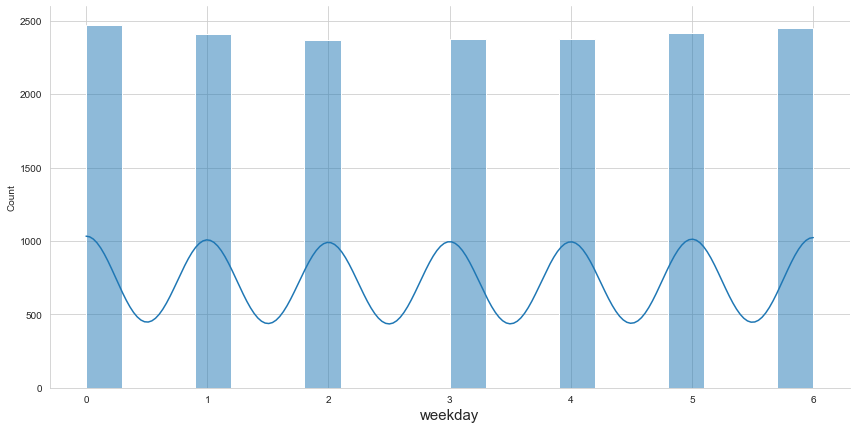

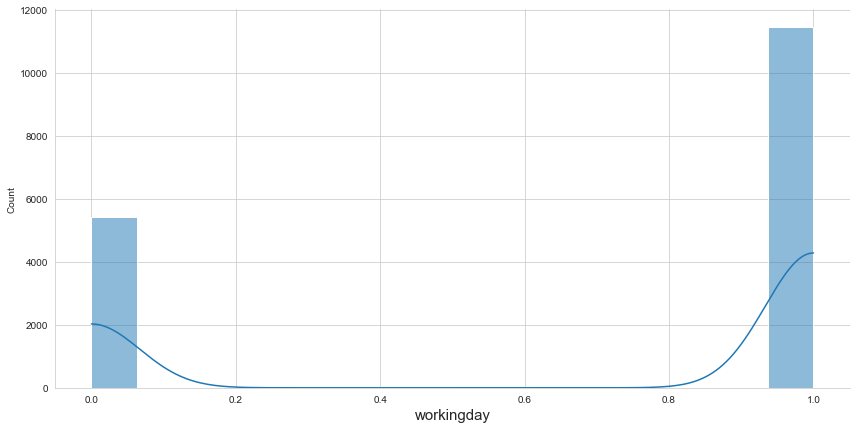

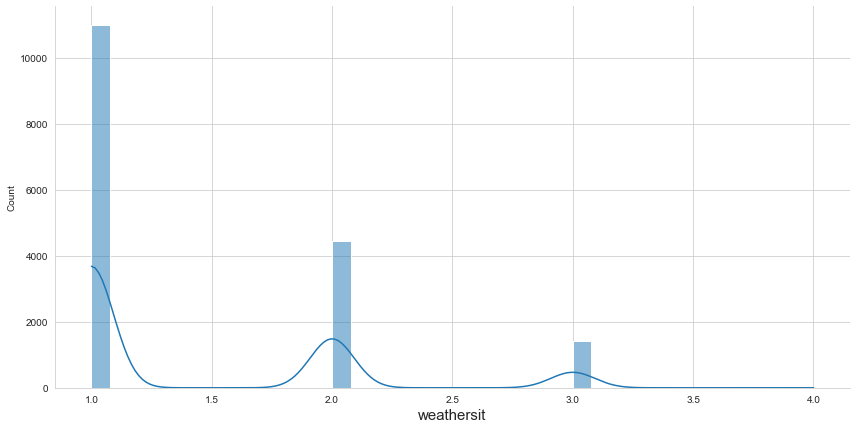

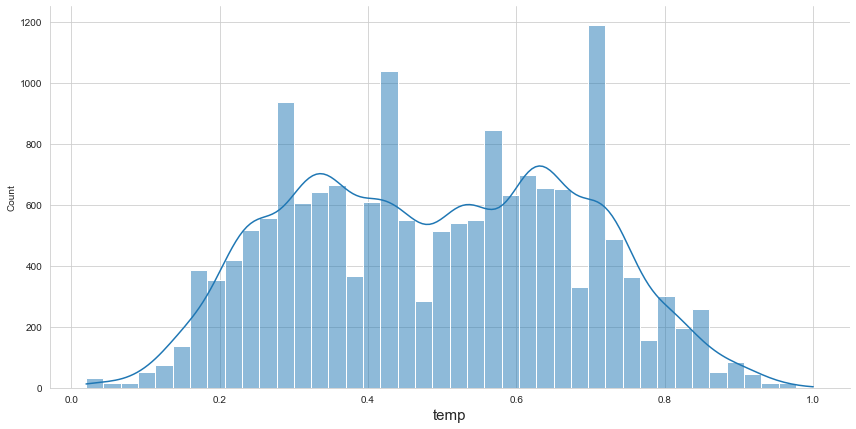

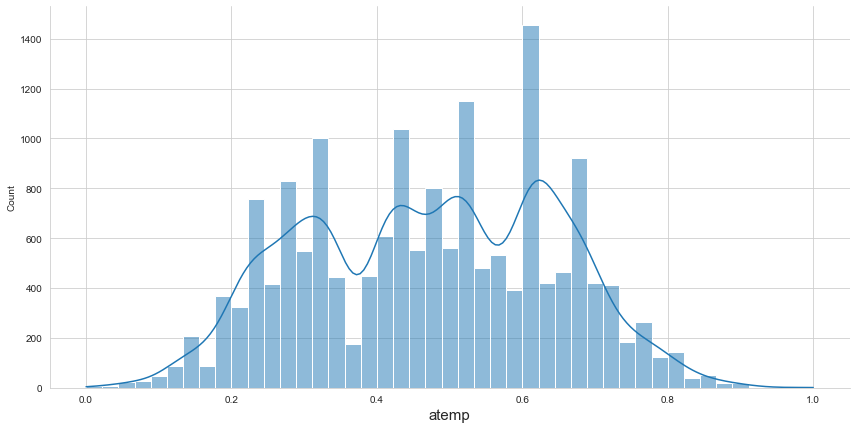

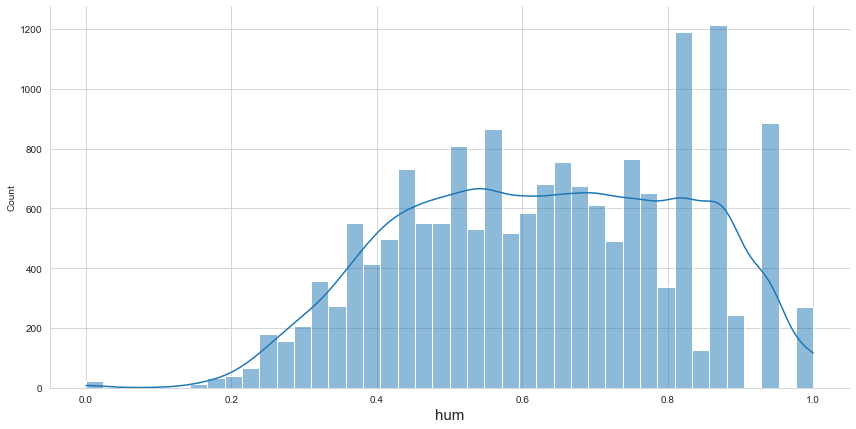

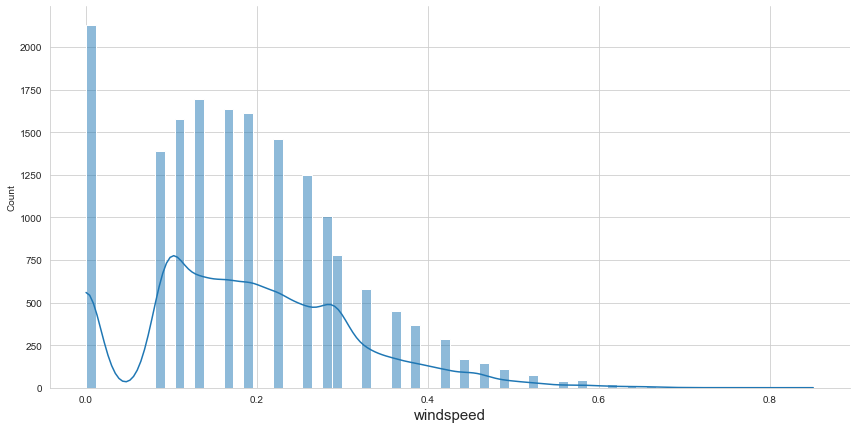

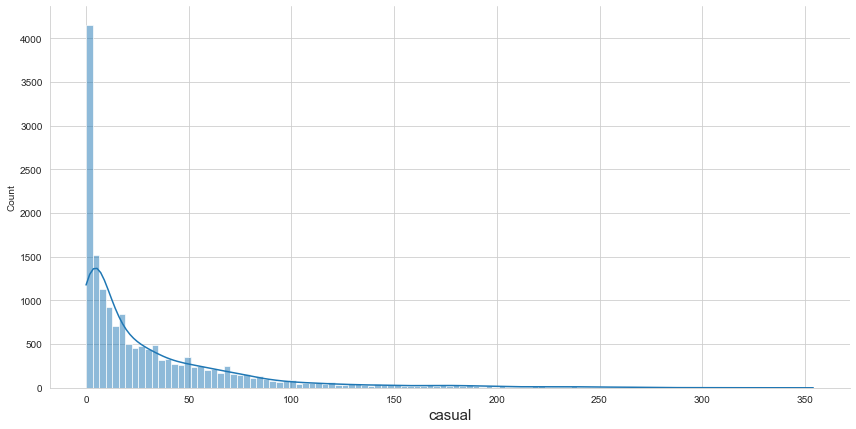

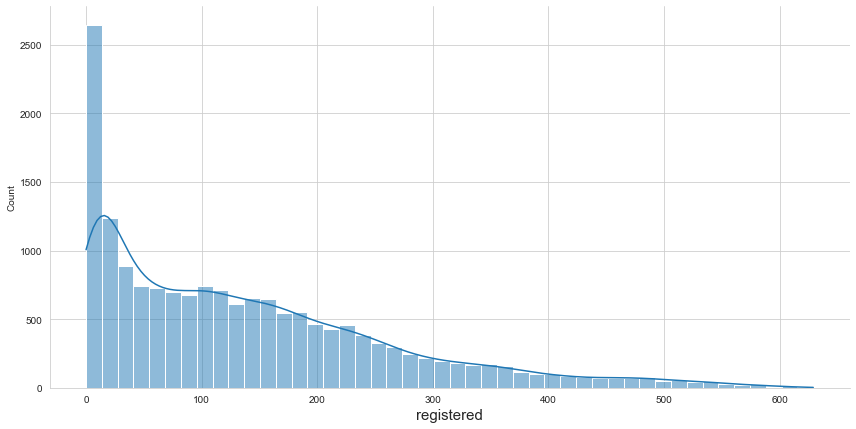

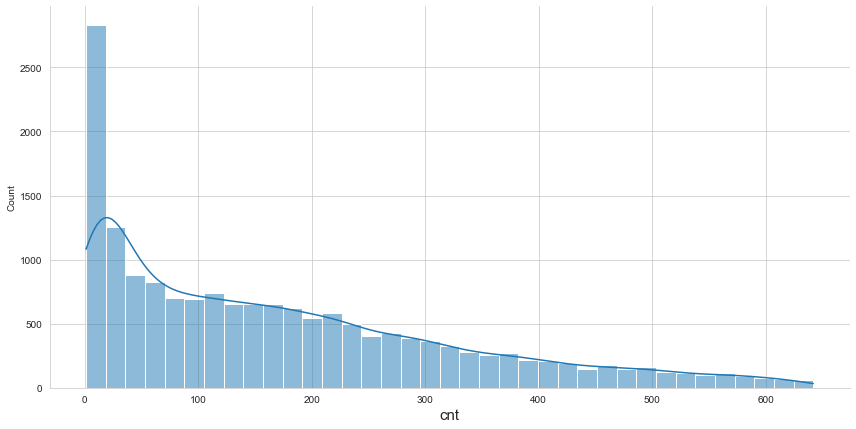

In [31]:
# Visualizing all the numerical feautures

for i in numerical_df:
  sns.displot(x = i, data = xdf, height = 6, aspect = 2, kde = True);
  plt.xlabel(i, fontsize = 15)

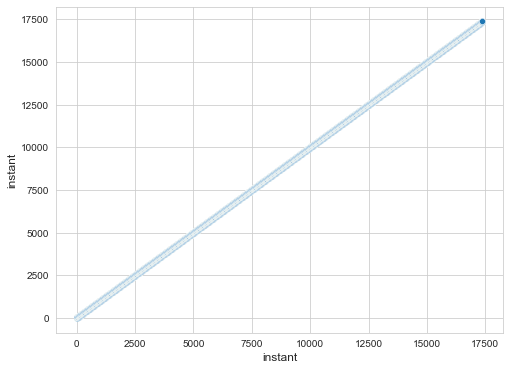

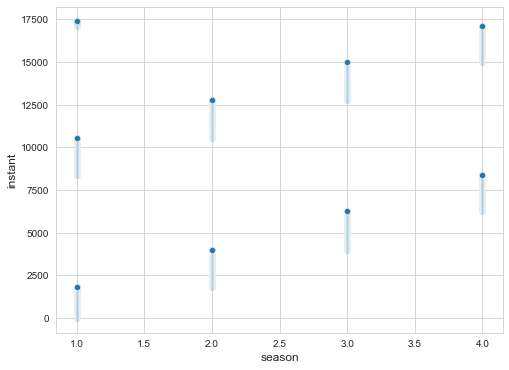

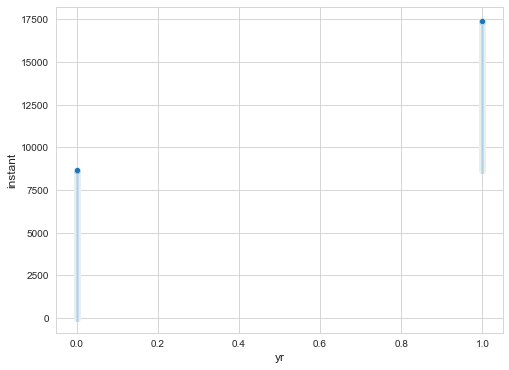

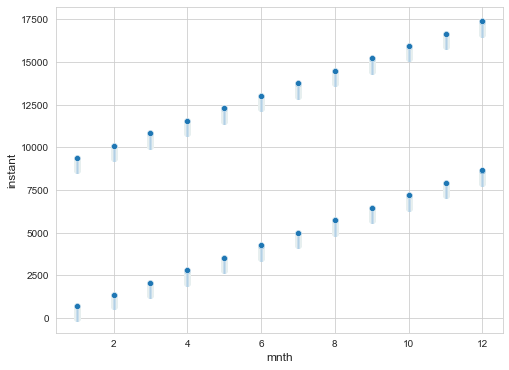

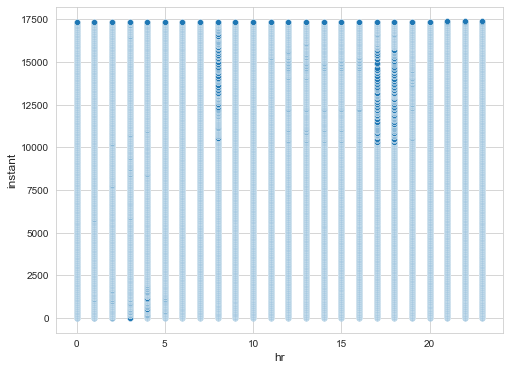

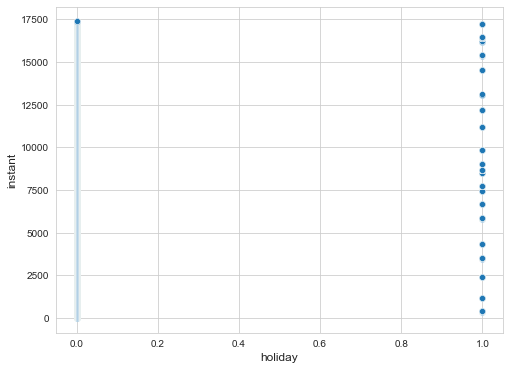

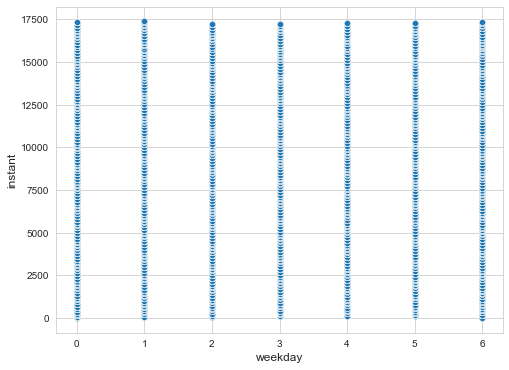

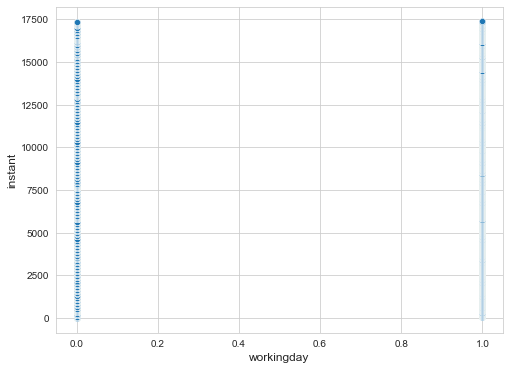

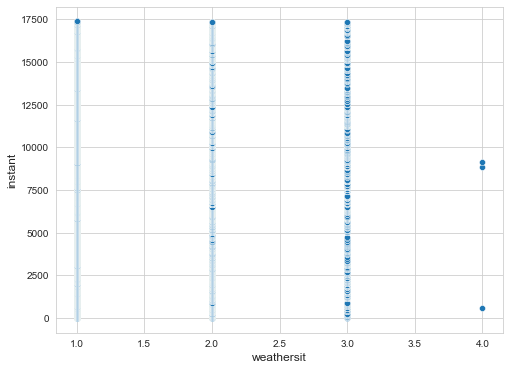

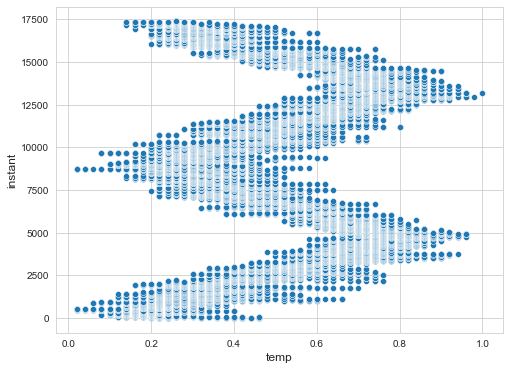

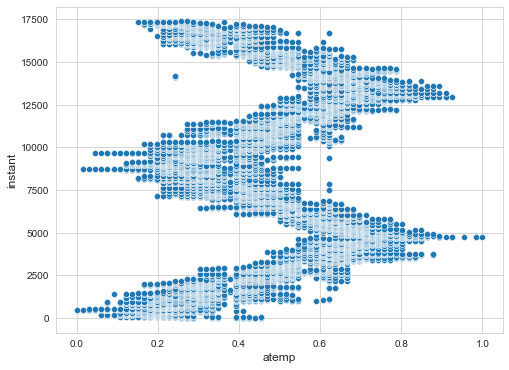

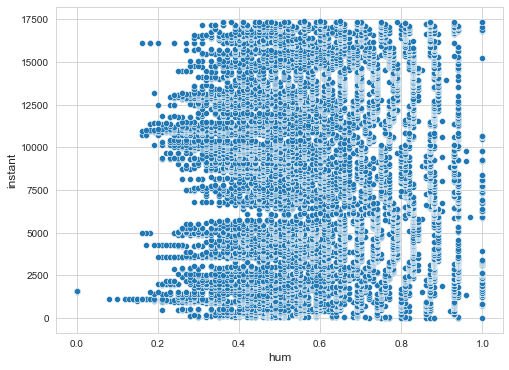

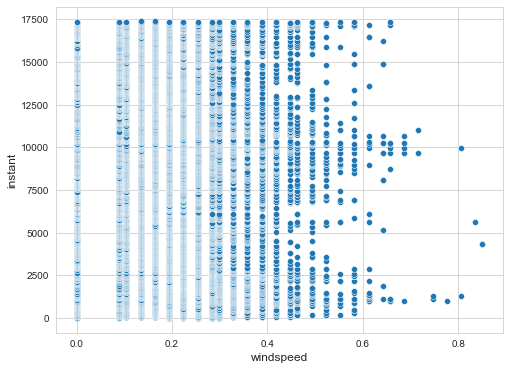

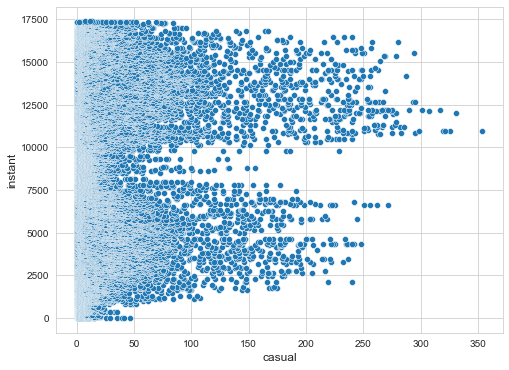

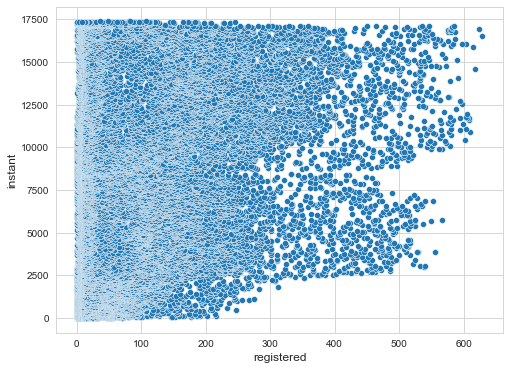

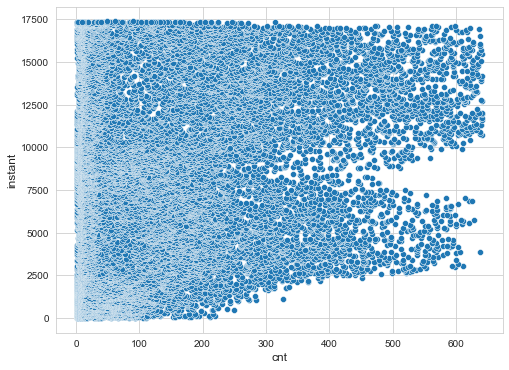

In [32]:
# Let's check their scatterplots

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.scatterplot(x = i, y = "instant", data = xdf);
  plt.xlabel(i, fontsize = 12)
  plt.ylabel("instant", fontsize = 12)

#### We can observe some outliers below on <b> hum <b> and outliers on <b> wind speed </b>. Let's confirm it on boxplot.

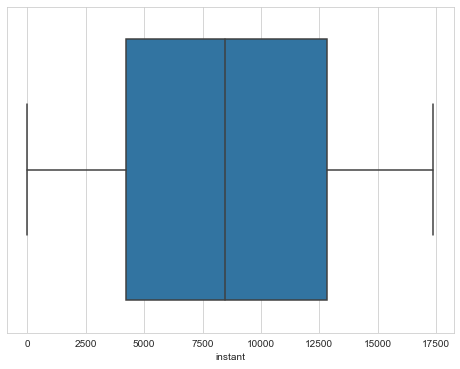

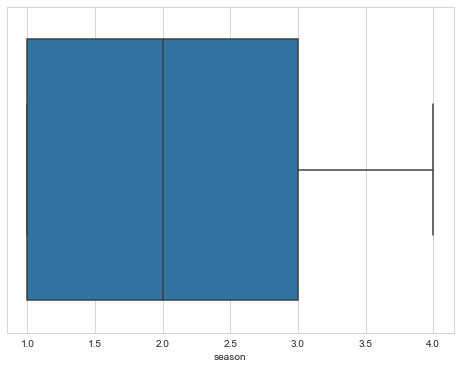

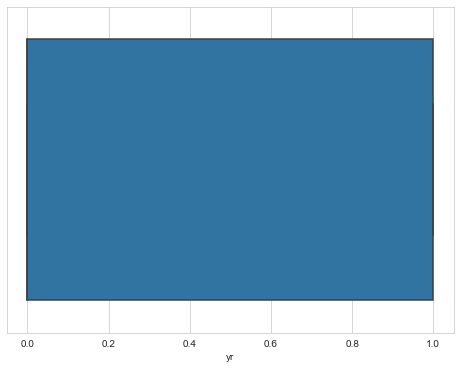

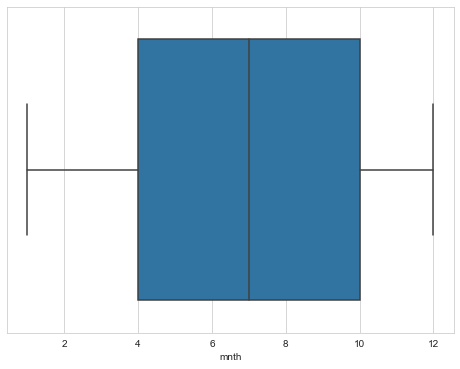

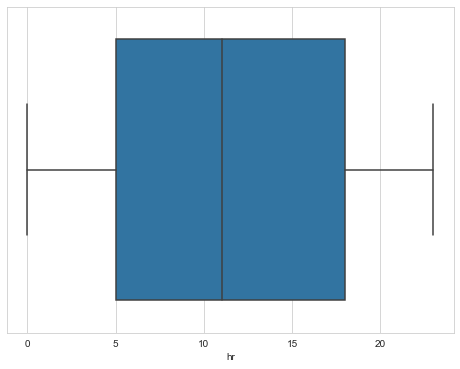

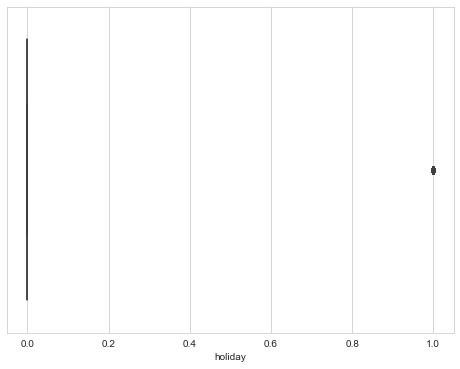

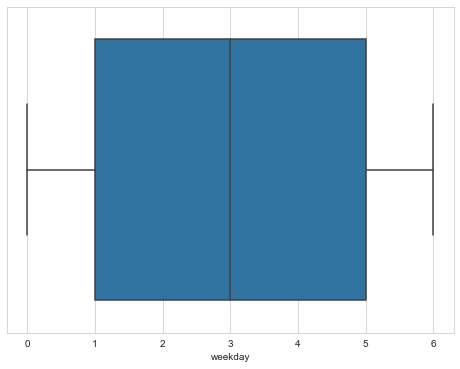

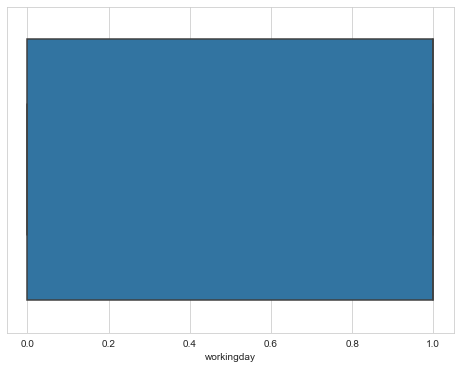

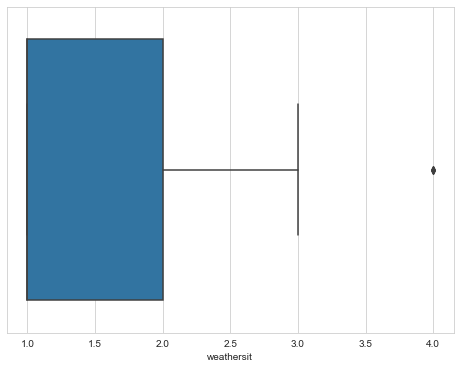

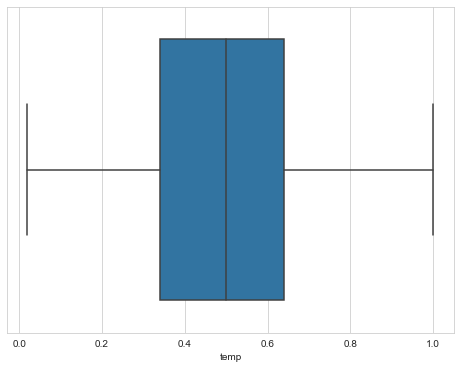

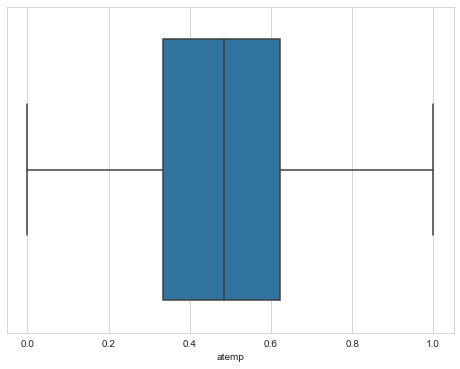

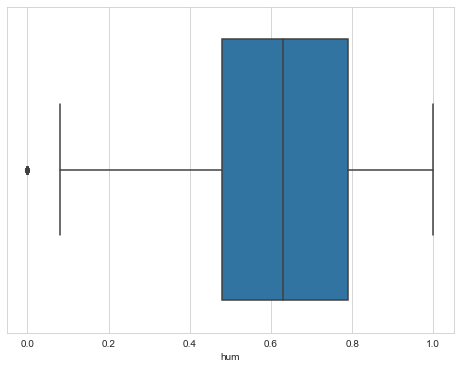

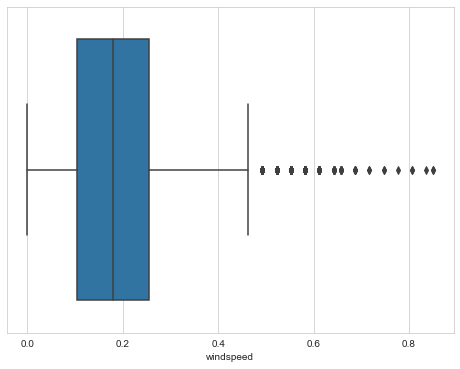

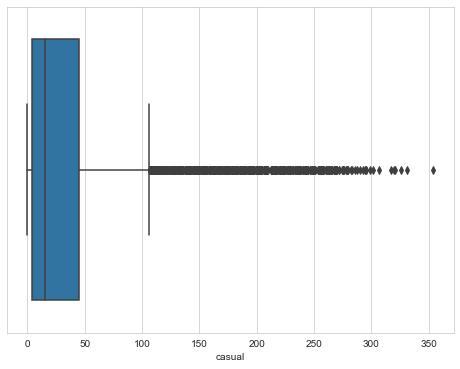

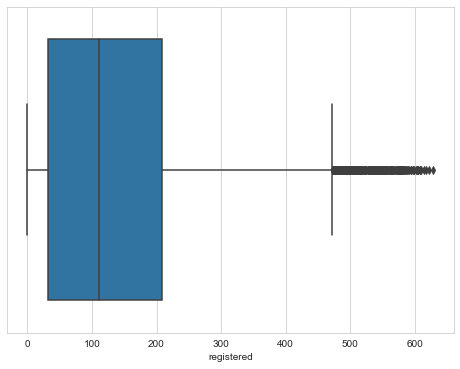

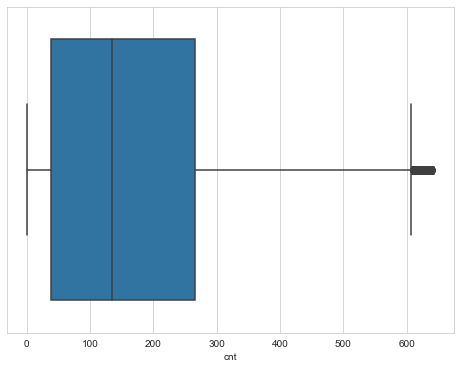

In [33]:
# Boxplot

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.boxplot(x = i, data = xdf);

#### <b> Observations </b>
- hum is negatively skewed and has outliers.
- wind_speed has also some outliers.
- weathersit is actually a categorical variable, we won't be fixing it.

In [34]:
## Let's remove outliers from 'hum'

xdf = remove_outliers(xdf, 'hum')

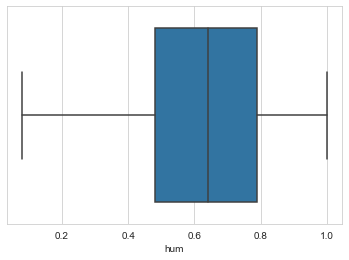

In [35]:
# after removoing 'hum' outlier

sns.boxplot(x = 'hum', data = xdf);

In [36]:
## Let's also remove outliers from 'hum'

xdf = remove_outliers(xdf, 'windspeed')

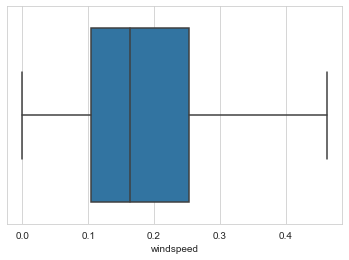

In [37]:
# after removoing 'hum' outlier

sns.boxplot(x = 'windspeed', data = xdf);

## Multivariate analysis


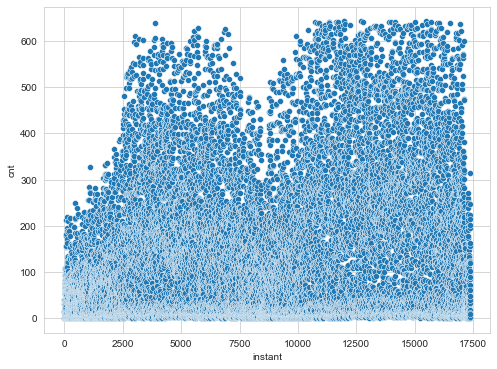

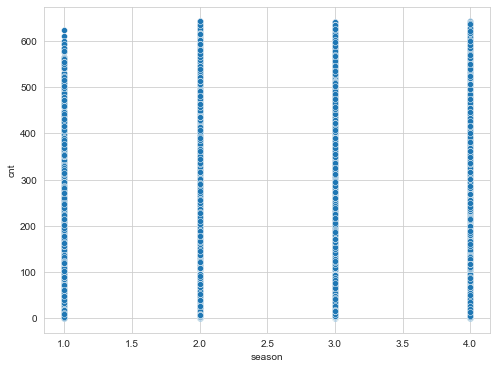

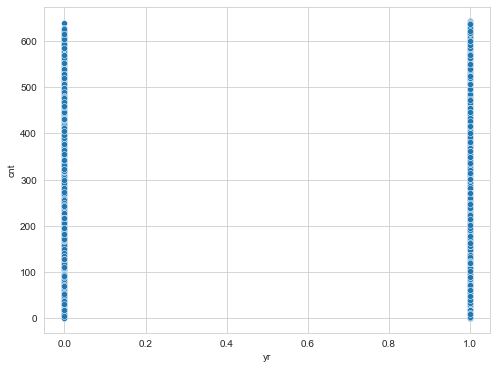

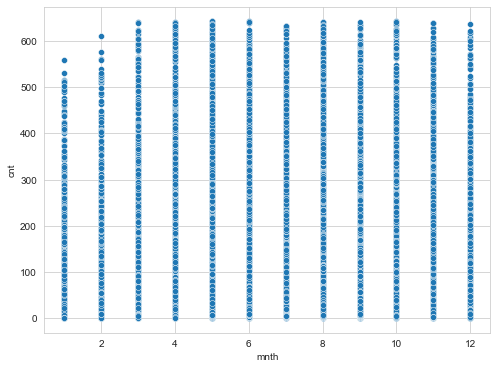

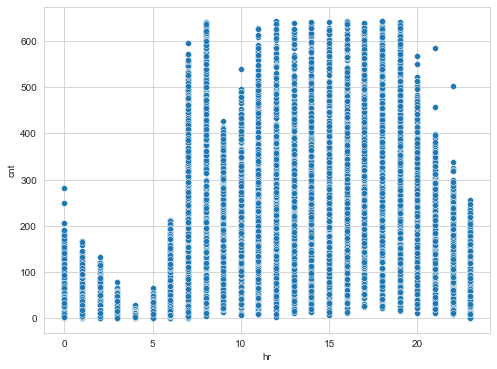

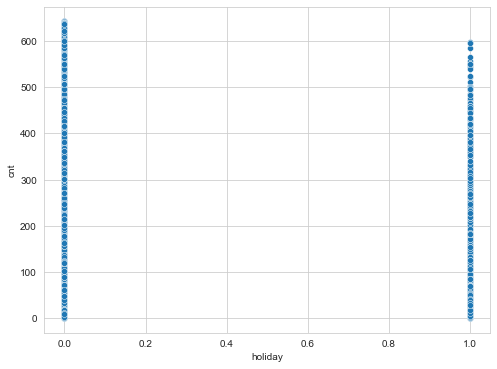

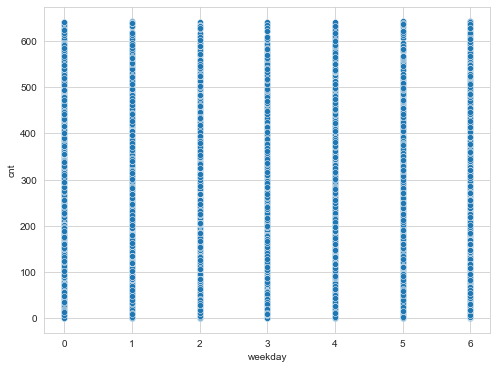

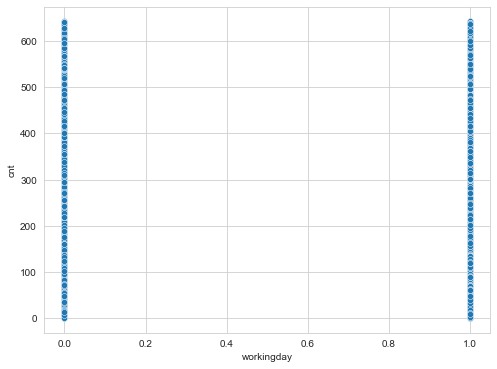

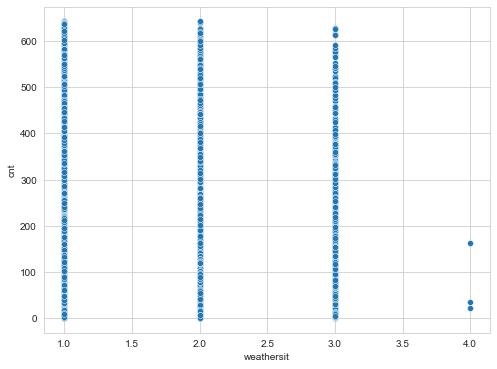

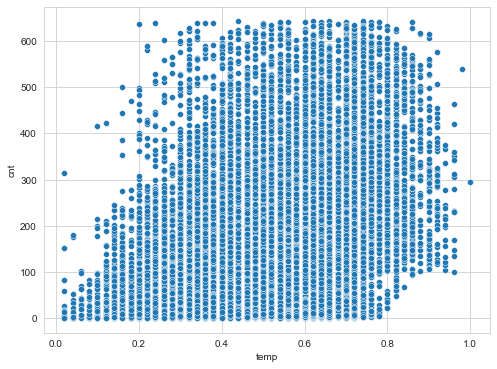

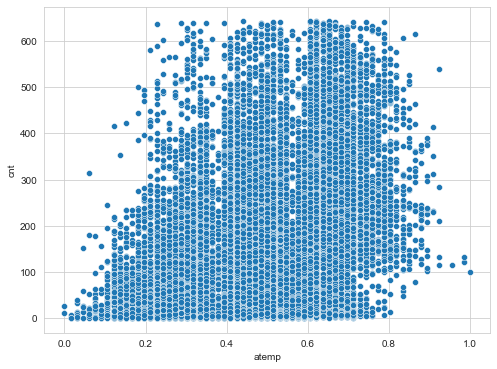

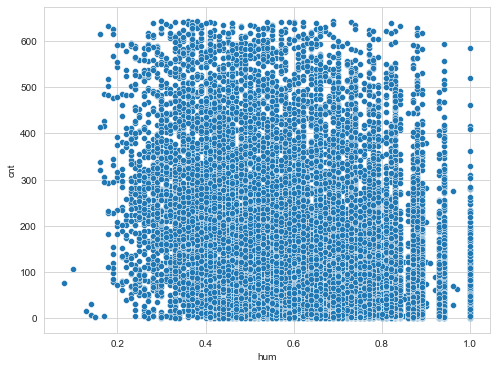

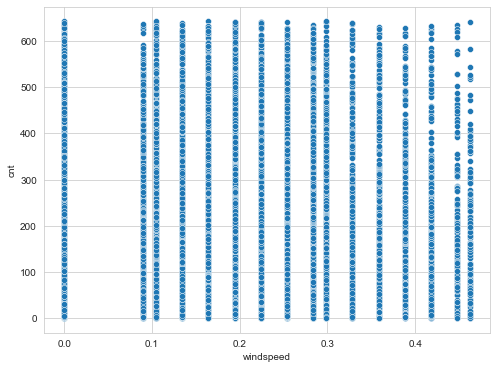

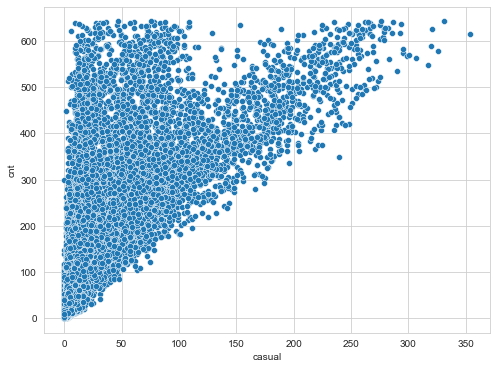

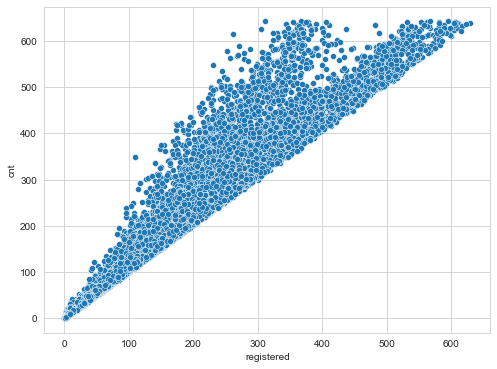

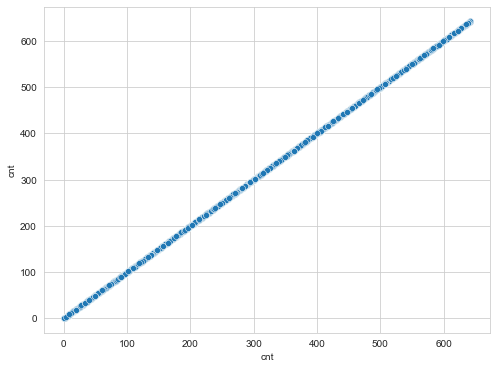

In [38]:
# Let's check the relation between the independent Variables & the target attribute

for i in numerical_df:
  plt.figure(figsize = (8,6))
  sns.scatterplot(x = i, y = 'cnt', data = xdf);

<AxesSubplot:>

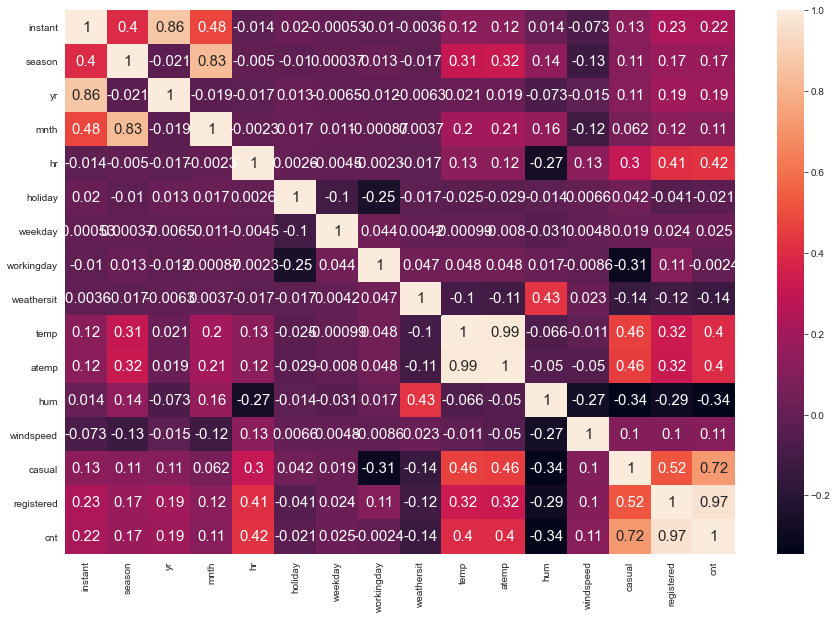

In [39]:
corr = xdf.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

######  INFERENCES FROM THE ABOVE HEATMAP--

1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. season, year, month and casual are highly related as expected.
 
3. humidity and windspeed is inversely related to count as expected as the weather is humid and windy people will not like to travel on a bike.

8. registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

9. similarly we can draw some more inferences like weather and humidity and so on... .


## Categorical analyses

In [40]:
xdf['weathersit'].value_counts()

1    10798
2     4384
3     1337
4        3
Name: weathersit, dtype: int64

In [41]:
categorical_df = ['weathersit']

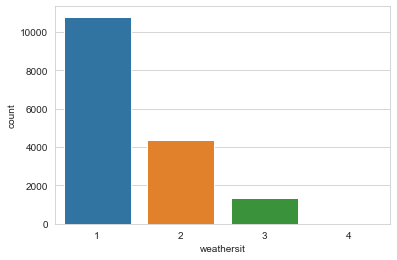

In [42]:
for i in categorical_df:
  sns.countplot(x = i, data = xdf);

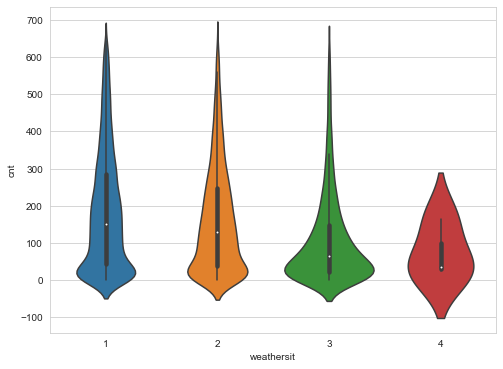

In [43]:
## with taget variable

plt.figure(figsize = (8,6))
sns.violinplot(y = 'cnt', x = 'weathersit', data = xdf);

<b> Observations </b>
- Weathersit 1 has more number of counts 
- So, does Weathersit 2 but little less than Weather 1.
- Weathersit 3 is the count around, 0 - 50


## Feature Engineering

Date extracting into date format

In [44]:
# convert date (object) into datetime

xdf['dteday'] = pd.to_datetime(df['dteday'], format = '%Y%m%d %H:%M:%S')

In [45]:
xdf['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 16522, dtype: datetime64[ns]

### <b> Month

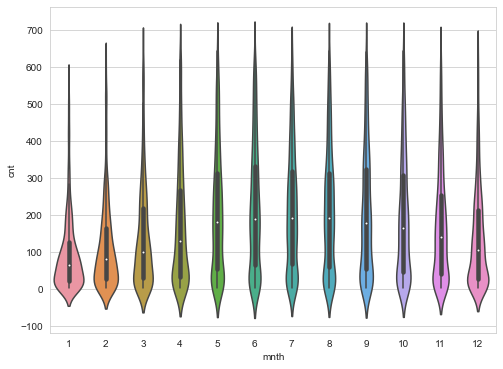

In [46]:
# Let's see which month is the popular for cycle sharing.

plt.figure(figsize = (8,6))
sns.violinplot(x = xdf['mnth'] , y = 'cnt', data = xdf);

#### We can see <b>  <b> July </b> and <b> August </b> tend to have more number of bikes shared. People use mostly the bike during summer months

### <b> Year

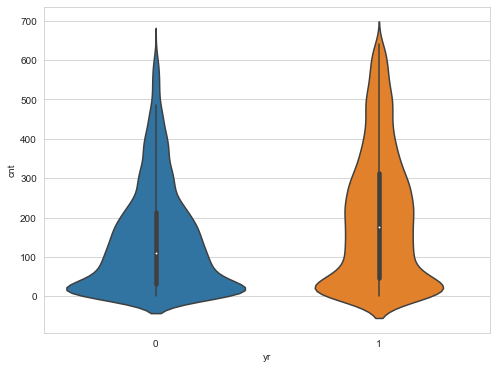

In [47]:
## Let's look at the year

plt.figure(figsize = (8,6))
sns.violinplot(x = xdf['yr'] , y = 'cnt', data = xdf);

#### The density of a Cycling has dropped over the years.

### <b> Hour

Text(0.5, 0, 'hr')

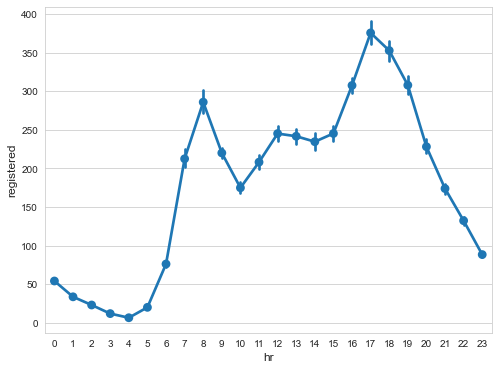

In [48]:
## Let's visualize in respect to an hour

plt.figure(figsize = (8,6))
sns.pointplot(x = xdf['hr'] , y = 'cnt', data = xdf);
plt.ylabel("registered", fontsize = 12)
plt.xlabel("hr", fontsize = 12)

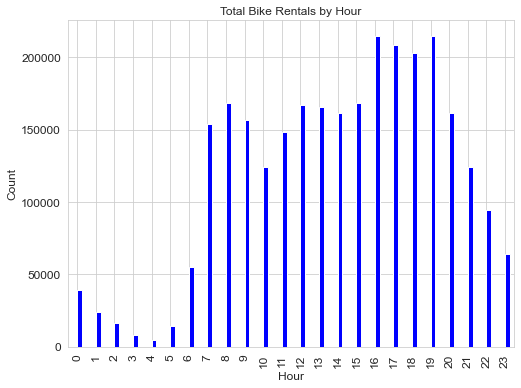

In [49]:
# alternative way of plotting using groupby
ax = xdf[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='blue', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()



#### As expected, peak hours between 16h and 20h are the busiest.

#### the above graph of 'weathersit' shows that people tends to rent the most bikes in clear weather and none during heavy rain,  for  'season' show the fall is the top season to rent bike and spring the less popular, but suprisly winter is not doing that bad.


## Preparing Dataset for model


### In most case to make a machine leaarning model we need to clean the data and here we have done the cleaning in order to be 'model ready',we have alredy drop some unused feature and we have no null values. Next we will be :

- dropping irrelevant features
- mapping the categorcial features
- creating the dummy variables




In [50]:
## dropping columns that are irrelevant for the model - 
xdf.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
xdf.head()


season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1

In [51]:
### Converting some numeric values to categorical data
import calendar
xdf['mnth'] = xdf['mnth'].apply(lambda x: calendar.month_abbr[x])

In [52]:
## maping seasons
xdf.season = xdf.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [53]:
## mapping weathersit
xdf.weathersit = xdf.weathersit.map({1:'Clear',2:'Mist&Cloudy', 
                                             3:'LightSnow&Rain',4:'HeavySnow&Rain'})

In [54]:
xdf.weekday = xdf.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [55]:
# Check the dataframe now

xdf.head()

season  yr mnth  hr  holiday   weekday  workingday weathersit  temp  \
0  Spring   0  Jan   0        0  Saturday           0      Clear  0.24   
1  Spring   0  Jan   1        0  Saturday           0      Clear  0.22   
2  Spring   0  Jan   2        0  Saturday           0      Clear  0.22   
3  Spring   0  Jan   3        0  Saturday           0      Clear  0.24   
4  Spring   0  Jan   4        0  Saturday           0      Clear  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1

## Dummy Variables

In [56]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = xdf[['season','mnth','weekday','weathersit']]

In [57]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [58]:
## adding dummy variables to original dataset
xdf = pd.concat([dummy,xdf],axis = 1)

In [59]:
# Now let's see the head of our dataframe.
xdf.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  hr  holiday   weekday  \
0         1         0         0         0  ...   0        0  Saturday   
1         1         0         0         0  ...   1        0  Saturday   
2         1         0         0         0  ...   2        0  Saturday   
3         1         0         0         0  ...   3        0  Saturday   
4         1         0         0         0  ...   4        0  Saturday   

   workingday  weathersit  temp   atemp   hum  windspeed  cnt  
0           0       Clear  0.24  0.2879  0.81        0.0   16  
1           0       Clear  0.22  0.2727  0.80        0.0   40  
2           0       Clear  0.22  0.2727  0.80        0.0   32  
3           0       Clear  0.24  0.2879  0.75        0.0   13  
4           0       Clear  0.24  0.2879  0.75        0.0    1  

[5 rows x 36 columns]

In [60]:
## dropping columns for which dummy variables were created
xdf.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [61]:
xdf.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  weathersit_Mist&Cloudy  yr  \
0         1         0         0         0  ...                       0   0   
1         1         0         0         0  ...                       0   0   
2         1         0         0         0  ...                       0   0   
3         1         0         0         0  ...                       0   0   
4         1         0         0         0  ...                       0   0   

   hr  holiday  workingday  temp   atemp   hum  windspeed  cnt  
0   0        0           0  0.24  0.2879  0.81        0.0   16  
1   1        0           0  0.22  0.2727  0.80        0.0   40  
2   2        0           0  0.22  0.2727  0.80        0.0   32  
3   3        0           0  0.24  0.2879  0.75        0.0   13  
4   4        0           0  0.24  0.2879  0.75        0.0    1  

[5 rows x 32 columns]

## Splitting the Data into Training and Testing Sets

This is the first basic step for regression is performing a train-test split.

In [62]:
train, test = train_test_split(xdf, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 

In [63]:
scaler = MinMaxScaler()

In [64]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [65]:
train.head()

season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  \
7311               0              0              1         0         0   
5100               0              0              0         1         0   
6353               0              0              1         0         0   
13480              0              0              0         0         0   
3379               0              1              0         0         0   

       mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  \
7311          0         0         0         0         0  ...   
5100          0         0         0         0         0  ...   
6353          0         0         0         0         0  ...   
13480         0         0         1         0         0  ...   
3379          0         0         0         0         0  ...   

       weathersit_Mist&Cloudy  yr  hr  holiday  workingday      temp  \
7311                        0   0   6        0           0  0.255319   
5100                        0   0  10        0           1  0.765957   
6353                        1   0   7        0           1  0.638298   
13480                       0   1  21        0           1  0.638298   
3379                        0   0  17        0           1  0.765957   

          atemp       hum  windspeed       cnt  
7311   0.276909  0.793478   0.193646  0.023401  
5100   0.676889  0.510870   0.290253  0.252730  
6353   0.538485  0.934783   0.225848  0.386895  
13480  0.569253  0.815217   0.709747  0.188768  
3379   0.661556  0.467391   0.483899  0.936037  

[5 rows x 32 columns]

In [66]:
train.describe()

season_Spring  season_Summer  season_Winter      mnth_Aug  \
count   11565.000000   11565.000000   11565.000000  11565.000000   
mean        0.239429       0.253869       0.243147      0.084133   
std         0.426754       0.435243       0.429002      0.277599   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000      0.000000   
50%         0.000000       0.000000       0.000000      0.000000   
75%         0.000000       1.000000       0.000000      0.000000   
max         1.000000       1.000000       1.000000      1.000000   

           mnth_Dec      mnth_Feb      mnth_Jan      mnth_Jul      mnth_Jun  \
count  11565.000000  11565.000000  11565.000000  11565.000000  11565.000000   
mean       0.086641      0.075746      0.081626      0.089494      0.082577   
std        0.281320      0.264602      0.273805      0.285468      0.275253   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           mnth_Mar  ...  weathersit_Mist&Cloudy            yr            hr  \
count  11565.000000  ...            11565.000000  11565.000000  11565.000000   
mean       0.082490  ...                0.268137      0.486814     11.406744   
std        0.275122  ...                0.443008      0.499848      7.006129   
min        0.000000  ...                0.000000      0.000000      0.000000   
25%        0.000000  ...                0.000000      0.000000      5.000000   
50%        0.000000  ...                0.000000      0.000000     11.000000   
75%        0.000000  ...                1.000000      1.000000     18.000000   
max        1.000000  ...                1.000000      1.000000     23.000000   

            holiday    workingday          temp         atemp           hum  \
count  11565.000000  11565.000000  11565.000000  11565.000000  11565.000000   
mean       0.030264      0.676265      0.507003      0.467925      0.604114   
std        0.171320      0.467921      0.204433      0.173900      0.205823   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.340426      0.323010      0.445652   
50%        0.000000      1.000000      0.510638      0.476848      0.608696   
75%        0.000000      1.000000      0.680851      0.615353      0.771739   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          windspeed           cnt  
count  11565.000000  11565.000000  
mean       0.392772      0.268048  
std        0.241137      0.242600  
min        0.000000      0.000000  
25%        0.225848      0.056162  
50%        0.354874      0.209048  
75%        0.548303      0.416537  
max        1.000000      1.000000  

[8 rows x 32 columns]

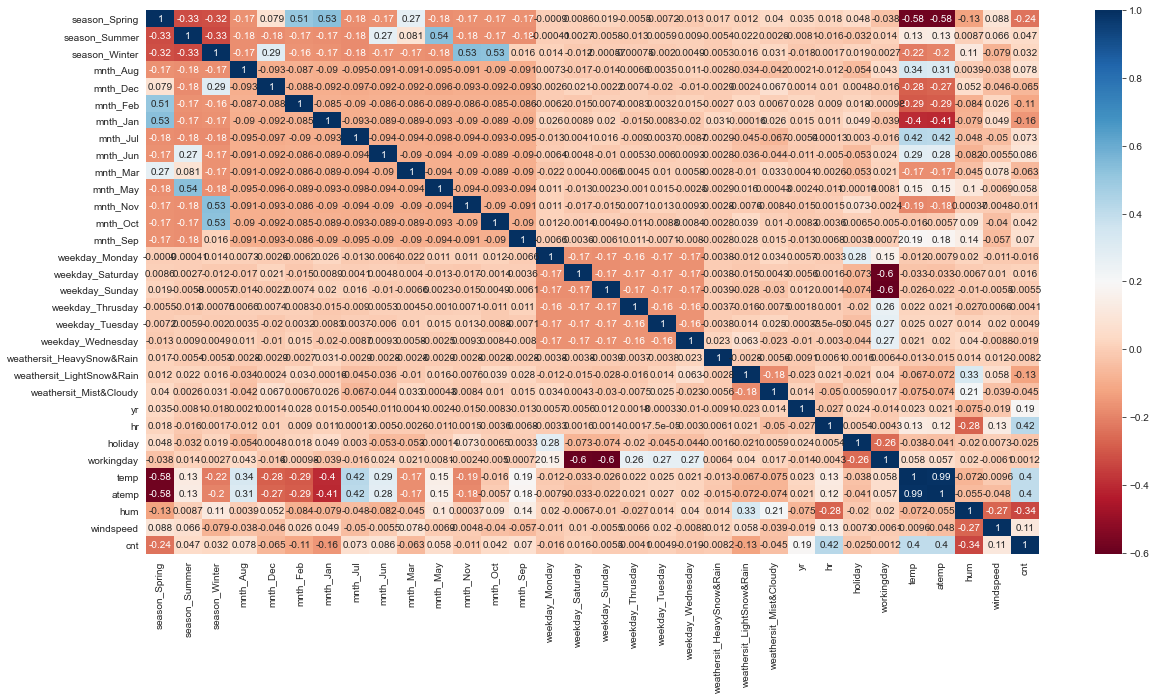

In [67]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="RdBu")
plt.show()

#### We'll first build a model using all the columns

### Dividing into X and Y sets for the model building

In [68]:
y_train = train.pop('cnt')
X_train = train

##  Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [69]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [70]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', False, 2),
 ('season_Summer', False, 17),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 15),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', False, 19),
 ('weekday_Monday', False, 13),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 18),
 ('weekday_Thrusday', False, 7),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 8),
 ('weathersit_HeavySnow&Rain', True, 1),
 ('weathersit_LightSnow&Rain', False, 9),
 ('weathersit_Mist&Cloudy', False, 6),
 ('yr', True, 1),
 ('hr', False, 11),
 ('holiday', False, 4),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3)]

### Starting with all the columns selected by RFE

### Model 1

In [71]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'weathersit_HeavySnow&Rain', 'yr',
       'temp', 'atemp', 'hum'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['season_Spring', 'season_Summer', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_LightSnow&Rain', 'weathersit_Mist&Cloudy', 'hr', 'holiday',
       'workingday', 'windspeed'],
      dtype='object')

In [73]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [74]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)


In [75]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [76]:
# Check the parameters obtained

lm.params

const                        0.092165
season_Winter                0.077485
mnth_Aug                    -0.089655
mnth_Dec                     0.042918
mnth_Feb                     0.030070
mnth_Jan                     0.046876
mnth_Jul                    -0.142095
mnth_Jun                    -0.083732
mnth_Mar                     0.023624
weathersit_HeavySnow&Rain    0.105137
yr                           0.072111
temp                         0.601016
atemp                        0.115733
hum                         -0.366719
dtype: float64

In [77]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     436.2
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        18:22:43   Log-Likelihood:                 2279.7
No. Observations:               11565   AIC:                            -4531.
Df Residuals:                   11551   BIC:                            -4428.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### - dropping 'weathersit_HeavySnow&Rain 'since it had p > 0.05 (  0.528)
#### - dropping 'atemp'since it had p > 0.05 (  0.108)

In [78]:
X_train_new = X_train_rfe.drop(["atemp","weathersit_HeavySnow&Rain" ], axis = 1)

### Rebuilding model without 'aptemp' & 'weathersit_HeavySnow&Rain'

### Model 2

In [79]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [80]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     515.2
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        18:22:43   Log-Likelihood:                 2278.3
No. Observations:               11565   AIC:                            -4533.
Df Residuals:                   11553   BIC:                            -4444.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0954      0.012      7.788      0.000       0.071       0.119
season_Winter     0.0779      0.005     14.277      0.000       0.067       0.089
mnth_Aug         -0.0914      0.008    -11.541      0.000      -0.107      -0.076
mnth_Dec          0.0432      0.008      5.706      0.000       0.028       0.058
mnth_Feb          0.0303      0.009      3.419      0.001       0.013       0.048
mnth_Jan          0.0467      0.009      5.038      0.000       0.029       0.065
mnth_Jul         -0.1425      0.008    -17.631      0.000      -0.158      -0.127
mnth_Jun         -0.0844      0.008    -10.784      0.000      -0.100      -0.069
mnth_Mar          0.0237      0.008      2.971      0.003       0.008       0.039
yr                0.0720      0.004     19.373      0.000       0.065       0.079
temp              0.7000      0.016     42.683      0.000       0.668       0.732
hum              -0.3652      0.009    -39.344      0.000      -0.383      -0.347
==============================================================================
Omnibus:                     1200.161   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1624.466
Skew:                           0.853   Prob(JB):                         0.00
Kurtosis:                       3.676   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [82]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           const  43.88
10           temp   3.29
5        mnth_Jan   1.88
4        mnth_Feb   1.61
1   season_Winter   1.60
6        mnth_Jul   1.56
2        mnth_Aug   1.41
8        mnth_Mar   1.41
7        mnth_Jun   1.36
3        mnth_Dec   1.33
11            hum   1.07
9              yr   1.01

#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [83]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [84]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9            temp  8.30
10            hum  6.57
8              yr  1.94
0   season_Winter  1.80
5        mnth_Jul  1.65
1        mnth_Aug  1.52
6        mnth_Jun  1.48
2        mnth_Dec  1.25
4        mnth_Jan  1.23
7        mnth_Mar  1.21
3        mnth_Feb  1.18

### Model 3 (Final model)

In [85]:
### dropping temp from the model
X_train_new = X_train_new.drop(['temp', 'hum'], axis=1)

In [86]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [87]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 24 May 2021   Prob (F-statistic):          1.97e-258
Time:                        18:22:43   Log-Likelihood:                 584.20
No. Observations:               11565   AIC:                            -1148.
Df Residuals:                   11555   BIC:                            -1075.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.005     50.384

In [88]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8             yr  1.58
0  season_Winter  1.32
2       mnth_Dec  1.19
1       mnth_Aug  1.07
3       mnth_Feb  1.07
4       mnth_Jan  1.07
5       mnth_Jul  1.07
7       mnth_Mar  1.07
6       mnth_Jun  1.06

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

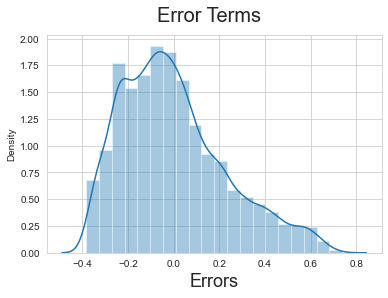

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

### Applying the scaling on the test sets

In [91]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [92]:
test.describe()

season_Spring  season_Summer  season_Winter     mnth_Aug     mnth_Dec  \
count    4957.000000    4957.000000    4957.000000  4957.000000  4957.000000   
mean        0.253984       0.249143       0.251160     0.084325     0.088360   
std         0.435333       0.432560       0.433724     0.277903     0.283846   
min         0.000000       0.000000       0.000000     0.000000     0.000000   
25%         0.000000       0.000000       0.000000     0.000000     0.000000   
50%         0.000000       0.000000       0.000000     0.000000     0.000000   
75%         1.000000       0.000000       1.000000     0.000000     0.000000   
max         1.000000       1.000000       1.000000     1.000000     1.000000   

          mnth_Feb     mnth_Jan     mnth_Jul     mnth_Jun     mnth_Mar  ...  \
count  4957.000000  4957.000000  4957.000000  4957.000000  4957.000000  ...   
mean      0.078677     0.089772     0.079080     0.083115     0.083720  ...   
std       0.269261     0.285884     0.269891     0.276083     0.276995  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       weathersit_Mist&Cloudy           yr           hr      holiday  \
count             4957.000000  4957.000000  4957.000000  4957.000000   
mean                 0.258826     0.491426    11.430906     0.028243   
std                  0.438034     0.499977     6.922283     0.165683   
min                  0.000000     0.000000     0.000000     0.000000   
25%                  0.000000     0.000000     5.000000     0.000000   
50%                  0.000000     0.000000    11.000000     0.000000   
75%                  1.000000     1.000000    17.000000     0.000000   
max                  1.000000     1.000000    23.000000     1.000000   

        workingday         temp        atemp          hum    windspeed  \
count  4957.000000  4957.000000  4957.000000  4957.000000  4957.000000   
mean      0.683881     0.497732     0.459324     0.598548     0.397046   
std       0.465007     0.206249     0.175013     0.208221     0.244811   
min       0.000000     0.000000    -0.015435     0.076087     0.000000   
25%       0.000000     0.319149     0.307677     0.434783     0.225848   
50%       1.000000     0.489362     0.461515     0.597826     0.354874   
75%       1.000000     0.659574     0.615353     0.771739     0.548303   
max       1.000000     1.042553     0.923030     1.000000     1.000000   

               cnt  
count  4957.000000  
mean      0.269457  
std       0.242431  
min       0.000000  
25%       0.059282  
50%       0.210608  
75%       0.408736  
max       0.998440  

[8 rows x 32 columns]

#### Dividing into X_test and y_test

In [93]:
y_test = test.pop('cnt')
X_test = test

In [94]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [95]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4957 entries, 16588 to 15841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          4957 non-null   float64
 1   season_Winter  4957 non-null   uint8  
 2   mnth_Aug       4957 non-null   uint8  
 3   mnth_Dec       4957 non-null   uint8  
 4   mnth_Feb       4957 non-null   uint8  
 5   mnth_Jan       4957 non-null   uint8  
 6   mnth_Jul       4957 non-null   uint8  
 7   mnth_Jun       4957 non-null   uint8  
 8   mnth_Mar       4957 non-null   uint8  
 9   yr             4957 non-null   int64  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 154.9 KB


### Model 4

In [96]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.10530649232654021

In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.052573050782836875

##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

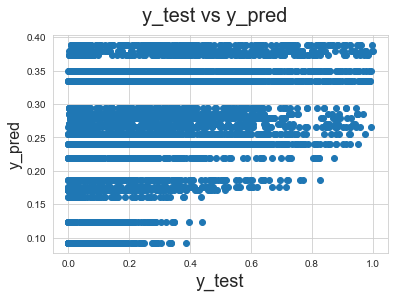

In [99]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      